In [ ]:
from backend.roughplanning.RoughPlanning import RoughPlanning
from backend.roughplanning.RoughPlanDrawer import RoughPlanDrawer
from backend.roughplanning.GNSS import GNSS_Point
import numpy as np

number_of_lines = 4
number_of_segments = 5
line_length = 300
min_elevation = 10 # gon

azimuths = [400 / number_of_lines * i for i in range(number_of_lines)]
elevation_angles = []

pt = GNSS_Point(name="3001", easting= 1_643_504, northing=1_260_541, floor_height=424.5)

rough1 = RoughPlanning(point=pt, dem_path="./testdata/raster.tif", method='CONVENTIONAL')
lines = rough1.create_lines(number_of_lines=number_of_lines, line_length=line_length)

for line in lines: # may  later be seperated on many cores
    segments = rough1.segment_line(number_of_segments=number_of_segments, line=line) # segment per line
    rough1.transform_linesegments(line_points=segments) # transformed segment per line
    profile = rough1.create_profile(line_points=segments) # create profile-Object
    max_alpha = rough1.get_max_angle(profile=profile)
    elevation_angles.append(max_alpha * 200 / np.pi)

drawer1 = RoughPlanDrawer()
drawer1.draw_panorama_diagram(azimuths=azimuths, elevation_angles=elevation_angles, min_elevation=min_elevation, image_path=f"./panorama_{pt.name}.png", pointname=pt.name)
drawer1.draw_polar_diagram(azimuths=azimuths, elevation_angles=elevation_angles, min_elevation=min_elevation, image_path=f"./polar_{pt.name}.png", pointname=pt.name)
drawer1.save_legend(legend_path="./legend.png")



In [1]:
from backend.roughplanning.RoughPlanning import RoughPlanning
from backend.roughplanning.RoughPlanDrawer import RoughPlanDrawer
from backend.roughplanning.GNSS import GNSS_Point
from backend.roughplanning.PDFCreator import PDFCreator



pt = GNSS_Point(name="3001", easting= 1_643_504, northing=1_260_541, floor_height=424.5)
pt2 = GNSS_Point(name="3002", easting= 1_643_504, northing=1_260_541, floor_height=424.5)

pdfcreator = PDFCreator(results_path="./bla.pdf")

pdfcreator.create_protocol(points=[pt, pt2], projectname="bal", projectleader="ich")

FileNotFoundError: Die Datei wurde nicht gefunden!

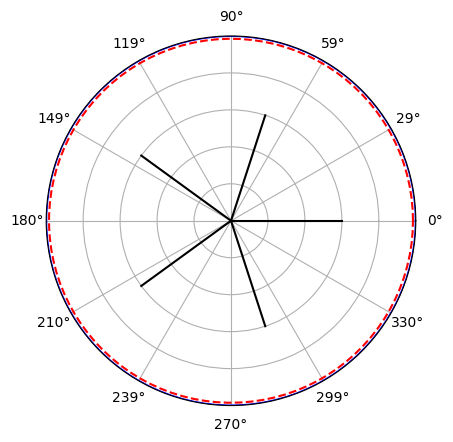

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def draw_polar_diagram(line_length, num_lines, cutoff_angle):
    """
    Zeichnet ein Polardiagramm mit radialen Linien und Achsenbeschriftungen als Winkel.
    Der Radius ist auf 5000 fixiert. Die Länge der Linien und ein Cutoff-Winkel sind variabel.

    Args:
    - line_length (float): Die Länge der radialen Linien.
    - num_lines (int): Die Anzahl der radialen Linien.
    - cutoff_angle (float): Der Winkel (in Grad) der Cutoff-Kurve.
    """
    radius_length = 5000  # Fixierter Radius

    # Erstelle eine neue Figur und eine Polarkoordinate
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    
    # Berechne die Winkel für die radialen Linien
    angles = np.linspace(0, 2 * np.pi, num_lines, endpoint=False)
    
    # Zeichne die radialen Linien
    for angle in angles:
        ax.plot([angle, angle], [0, line_length], color='black')
    
    # Zeichne einen Kreis für den fixierten Radius
    ax.plot(np.linspace(0, 2 * np.pi, 100), [radius_length] * 100, color='blue')
    
    # Zeichne die Cutoff-Kurve (Kreis)
    cutoff_radius = np.cos(np.deg2rad(cutoff_angle)) * radius_length
    ax.plot(np.linspace(0, 2 * np.pi, 100), [cutoff_radius] * 100, color='red', linestyle='--')
    
    # Setze den Radius-Limit
    ax.set_ylim(0, radius_length)
    
    # Setze Winkelbeschriftungen
    ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
    ax.set_xticklabels([f'{int(np.rad2deg(angle))}°' for angle in np.linspace(0, 2 * np.pi, 12, endpoint=False)])
    
    # Verstecke die Radiusbeschriftungen
    ax.set_yticklabels([])
    
    # Zeige das Diagramm
    plt.show()

# Beispielaufruf der Funktion
draw_polar_diagram(3000, 5, 10)


C:\Users\fruef\AppData\Local\Temp\ipykernel_33068\1299328582.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(directions)


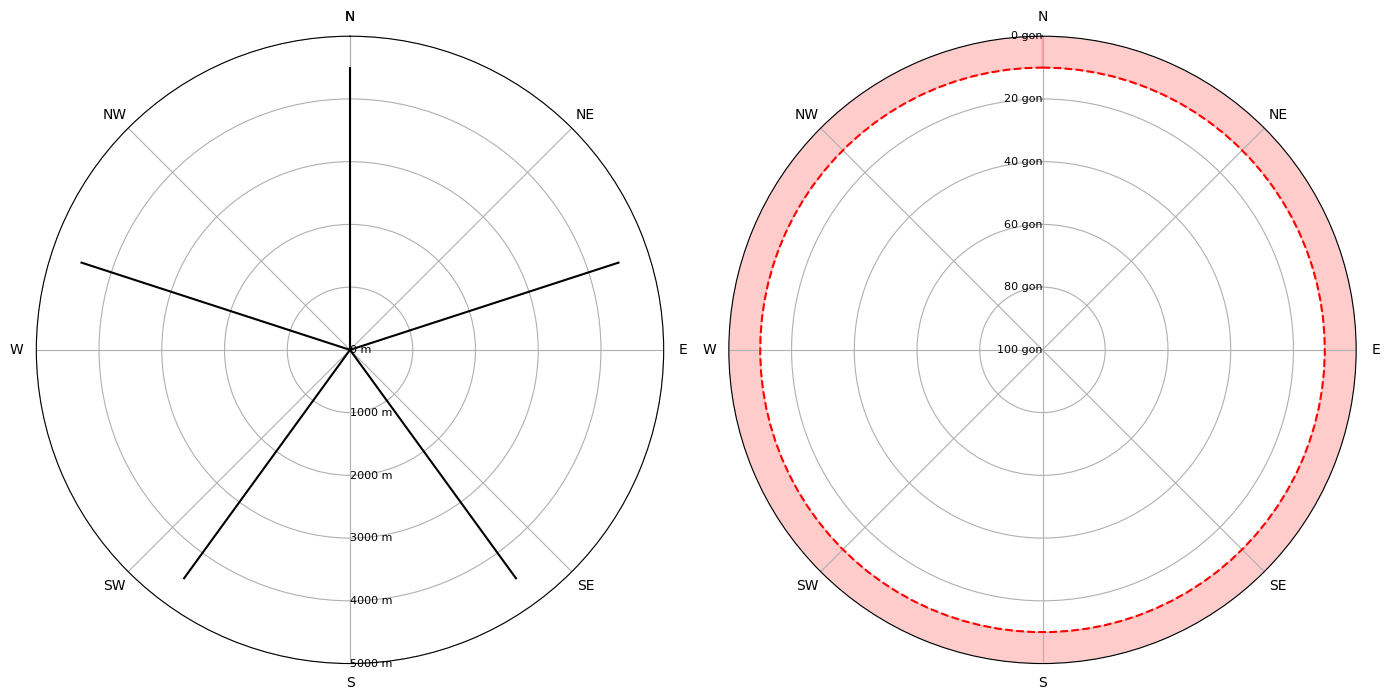

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def draw_polar_preview(num_lines, min_elevation, line_length, save: bool = False):
    """
    Draw a polar diagram with radial lines and axis labels in cardinal directions.
    
    Parameters
    ----------
    num_lines : int
        Number of radial lines to draw.
    min_elevation : float
        Elevation angle (in degrees) of the cutoff curve.
    line_length : float
        Length of the radial lines.

    Notes
    -----
    - The radius is fixed at 5000 units.
    - Line lengths are variable.
    - A cutoff angle is depicted as a curve.
    - Axes are labeled in gradians (gon) and meters, with gradians labels going from outer to inner.
    - A second diagram displays the cutoff angle with gradians labels.
    """
    radius_length = 5000  # fixed radius

    # create fig with two subplots next to each other
    fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(14, 7))

    # ------------------- Main Diagram ------------------- #

    # Set 0 to azimuth and set rotation to clockwise
    ax1.set_theta_zero_location('N')
    ax1.set_theta_direction(-1)

    # labels for angle
    directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N']
    direction_angles_rad = np.linspace(0, 2 * np.pi, len(directions))
    ax1.set_xticks(direction_angles_rad)
    ax1.set_xticklabels(directions)

    # calc angles for radial line
    angles = np.linspace(0, 2 * np.pi, num_lines, endpoint=False)
    
    # draw radial line
    for angle in angles:
        ax1.plot([angle, angle], [0, line_length], color='black')
    
    # set radial limit
    ax1.set_ylim(0, radius_length)
    
    # write axis label in meters
    radial_ticks = np.linspace(0, radius_length, 6)
    radial_labels_meter = [f'{int(tick)} m' for tick in radial_ticks]
    
    # set positions for radial ticks
    ax1.set_yticks(radial_ticks)
    
    # user defined axis-labels
    ax1.set_yticklabels([])
    for i, label in enumerate(radial_labels_meter):
        ax1.text(np.pi, radial_ticks[i], label, color='black', ha='left', va='center', fontsize=8)

    # ------------------- Cutoff-Angle-Diagramm ------------------- #

    # Set 0 to azimuth and set rotation to clockwise
    ax2.set_theta_zero_location('N')
    ax2.set_theta_direction(-1)
    
    # draw Cutoff-Curve (circle)
    cutoff_radius = 100 - min_elevation
    ax2.plot(np.linspace(0, 2 * np.pi, 100), [cutoff_radius] * 100, color='red', linestyle='--')
    
    # fill segment between 0 and cutoff
    ax2.fill_between(np.linspace(0, 2 * np.pi, 100), cutoff_radius, radius_length, color='red', alpha=0.2)
    
    # set limit for max angle (100 gon)
    ax2.set_ylim(0, 100)
    
    # label radial axis in Gon
    gon_ticks = np.linspace(0, 100, 6)
    gon_labels = [f"{100 - i * 20} gon" for i in range(6)]
    ax2.set_yticks(gon_ticks)
    for i, label in enumerate(gon_labels):
        ax2.text(0, gon_ticks[i], label, color='black', ha='right', va='center', fontsize=8)
    
    # hide meters
    ax2.set_yticklabels([])
    # user defined axis-labels
    ax2.set_xticklabels(directions)
    
    # show diagram
    plt.tight_layout()
    plt.show()

# Beispielaufruf der Funktion
draw_polar_preview(5, 10, 4500)
